<a href="https://colab.research.google.com/github/FredLongo/MLDL/blob/main/CNN_P1_E40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from datetime import datetime
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:


train_folder_name = "D:\\Databases\\Face expression recognition\\images\\train"
test_predict_folder_name = "D:\\Databases\\Face expression recognition\\images\\test_prediction"  # New prediction directory

batch_size = 10
no_of_classes = 7   # I should look this up
picture_size = 48   # I should look this up
epochs=40


In [ ]:



# Create a dataset for training
train_generator = tf.keras.utils.image_dataset_from_directory(
    train_folder_name,
    labels="inferred",
    label_mode="categorical",
    color_mode="grayscale",
    batch_size=batch_size,
    image_size=(picture_size, picture_size),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear"
)

# Create a dataset for testing
validation_generator = tf.keras.utils.image_dataset_from_directory(
    train_folder_name,
    labels="inferred",
    label_mode="categorical",
    color_mode="grayscale",
    batch_size=batch_size,
    image_size=(picture_size, picture_size),
    shuffle=True,
    seed=321,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear"
)


Found 28625 files belonging to 7 classes.
Using 22900 files for training.
Found 28625 files belonging to 7 classes.
Using 5725 files for validation.


In [ ]:
# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_generator.prefetch(buffer_size=AUTOTUNE)
val_ds = validation_generator.prefetch(buffer_size=AUTOTUNE)


In [ ]:

model = Sequential()

#1st CNN layer
model.add(Input(shape=(picture_size, picture_size, 1))),  # Explicit Input layer))
model.add(Conv2D(64,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))




In [ ]:

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [ ]:
print("Start Time:",(datetime.now()).strftime("%H:%M:%S"))

callbacks_list = [EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
                  ModelCheckpoint("model.keras", monitor='val_accuracy', save_best_only=True),
                  ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_delta=0.0001)]

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks_list
)

print("End Time:",(datetime.now()).strftime("%H:%M:%S"))


Start Time: 02:07:02
Epoch 1/40


  45/2290 ━━━━━━━━━━━━━━━━━━━━ 7:45 208ms/step - accuracy: 0.1489 - loss: 2.4187

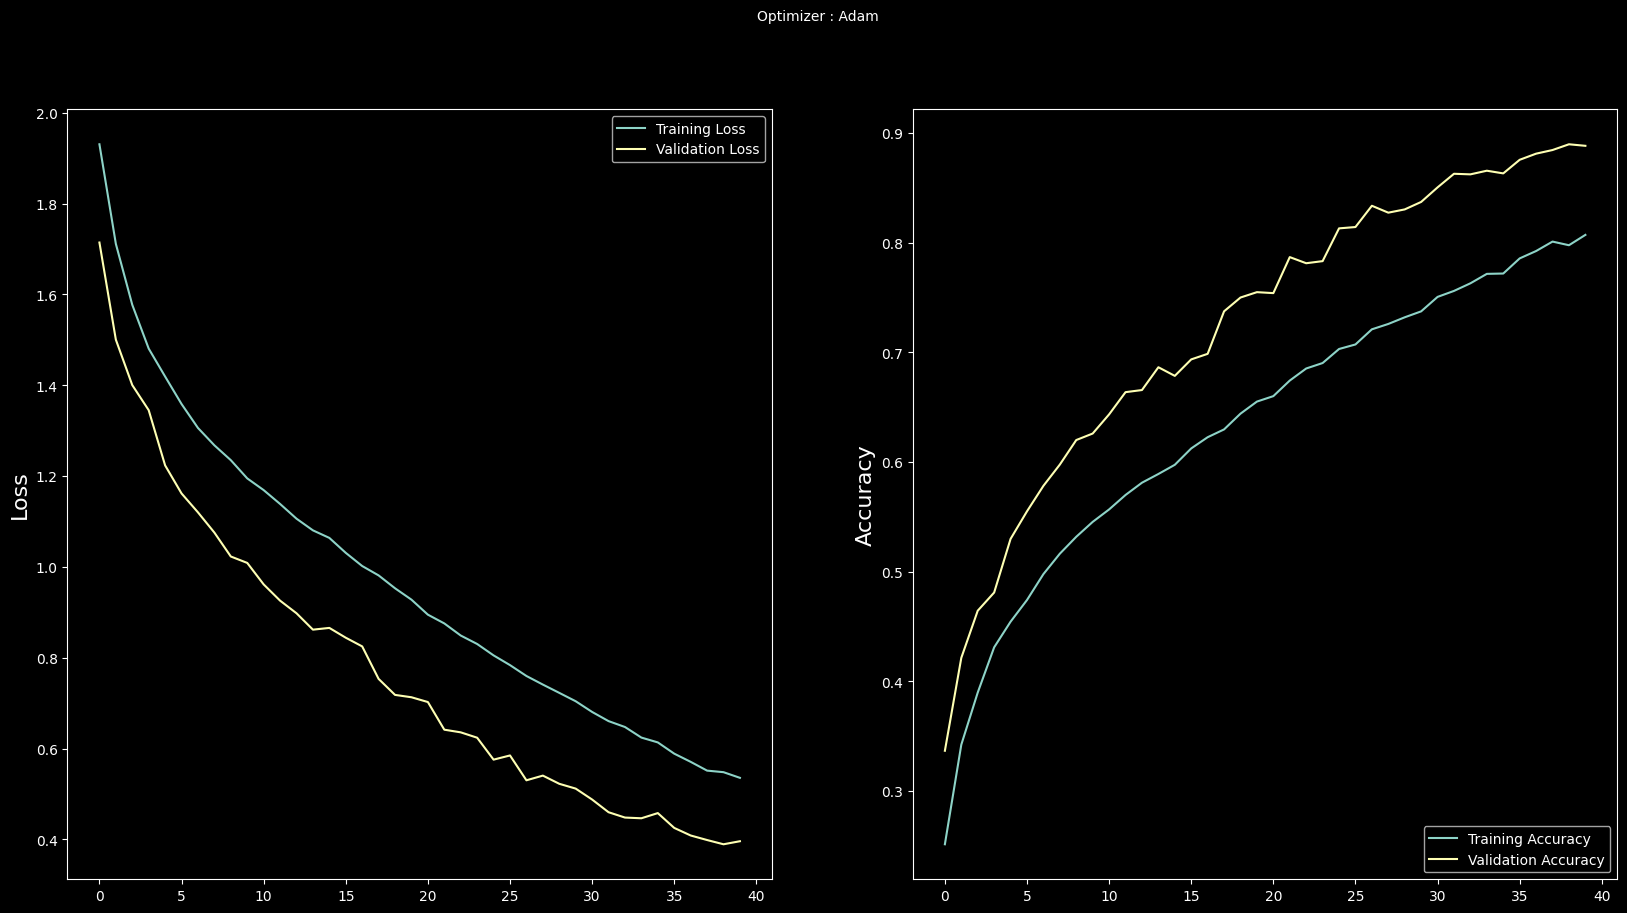

In [ ]:
# Graph Results
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Test Prediction data generator
test_predict_generator = tf.keras.utils.image_dataset_from_directory(
    test_predict_folder_name,
    labels="inferred",
    label_mode="categorical",
    color_mode="grayscale",
    batch_size=batch_size,
    image_size=(picture_size, picture_size),
    shuffle=False,
    seed=321,
    interpolation="bilinear")

Found 196 files belonging to 7 classes.


In [ ]:
# Predict the class of the new data
predictions = model.predict(test_predict_generator)
predicted_classes = np.argmax(predictions, axis=1)

#get True classes from  data set
true_classes =  np.array([])
for x , y in test_predict_generator:
    true_classes = np.concatenate([true_classes, np.argmax(y.numpy(), axis=-1)])

# Classification report
class_labels = {label: index for index, label in enumerate(test_predict_generator.class_names)}
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
              precision    recall  f1-score   support

       angry       0.40      0.48      0.44        25
     disgust       1.00      0.46      0.63        26
        fear       0.56      0.52      0.54        27
       happy       0.77      0.82      0.79        28
     neutral       0.66      0.79      0.72        29
         sad       0.48      0.50      0.49        30
    surprise       0.88      0.94      0.91        31

    accuracy                           0.65       196
   macro avg       0.68      0.64      0.65       196
weighted avg       0.68      0.65      0.65       196



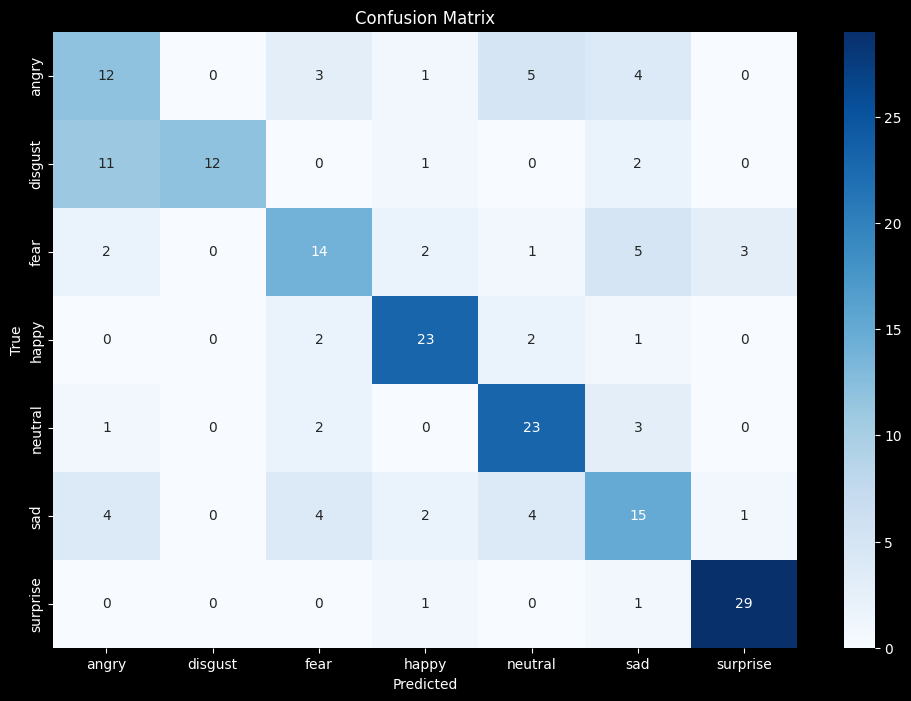

In [ ]:
# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()